

### <p style="color: #000000; font-size: 14px">Project name:Recipes from Tasty<br><br>Group number: 23<br><br>Data source:data kaggle.com<br><br>Source: Tasty's API<br><br>Names: Levona Tal, Aviya Shapira.</p>
https://www.kaggle.com/datasets/zeeenb/recipes-from-tasty/data

<div>
<img src='https://raw.githubusercontent.com/Aviyashap/project-tasty-/4e792494a42a4433c18be1fddd60f23efed65452/GIF_backround.gif' hight="100%"/>
</div>

---
### <span style="color: #000000; font-size: 28px"> import File and lib <span>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/Aviyashap/project-tasty-/main/dishes.csv'
tasty_df = pd.read_csv(url)

In [3]:
url_1 = 'https://raw.githubusercontent.com/Aviyashap/project-tasty-/main/tags.csv'
tags_df = pd.read_csv(url_1)

In [4]:
custom_palette = ['#f2655c', "#79dcf1"]
pei_colors = ['#79dcf1', '#aa979d', '#C8C8C8', '#CACACA','#A9A9A9', '#CECECE', '#D0D0D0',
    '#D2D2D2', '#D4D4D4', '#CACACA', '#D8D8D8', '#CACACA', '#D3D3D3', '#C8C8C8', '#CACACA', '#CACACA', '#CECECE', '#D0D0D0',
    '#D2D2D2', '#D4D4D4', '#CACACA', '#D8D8D8', '#aa979d']
pei_colors_1 = [ '#aa979d','#79dcf1', '#A9A9A9', '#CACACA', '#CACACA', '#CECECE', '#D0D0D0',
    '#D2D2D2', '#D4D4D4', '#CACACA', '#D8D8D8', '#CACACA', '#D3D3D3', '#C8C8C8', '#CACACA', '#CACACA', '#CECECE', '#D0D0D0',
    '#D2D2D2', '#D4D4D4', '#a3a3a3', '#D8D8D8', '#a3a3a3']
palette_color = ['#f2655c', '#f6e445','#4cb04b', '#a85fa6', '#533312', '#81d3e9', '#f7951d', '#b28460', '#c3dc7a']

---
### <span style="color: #000000; font-size: 28px"> Introduction <span>

The dataset contains around 4,961 recipes from the Tasty app.
Tasty is a free platform that provides recipes accompanied by video tutorials and various additional features depending on the recipe.

In [5]:
tasty_df.head()

,Unnamed: 0,country,description,id_,keywords,is_shoppable,language,name,slug,video_url,...,total_time,ratings_negative,ratings_positive,score,protein,fat,calories,sugar,carbohydrates,fiber
0,0,US,"Nothing says Sunday morning like a warm, gooey...",868,"bake sale, breakfast, cinnamon buns, cinnamon ...",True,eng,Homemade Cinnamon Rolls,homemade-cinnamon-rolls,https://vid.tasty.co/output/25812/mp4_640x640/...,...,151,475,17340,98.0,7.0,21.0,479.0,24.0,63.0,1.0
1,1,US,NaN,6124,"1000 whisk omelette, 3 ingredient mac & cheese...",True,eng,Whipped Coffee,whipped-coffee,https://vid.tasty.co/output/163616/landscape_4...,...,15,777,8483,92.0,0.0,0.0,69.0,18.0,18.0,0.0
2,2,US,NaN,3094,"dome pancakes, easy pancakes, japanese fluffy ...",True,eng,Fluffy Pancakes,fluffy-perfect-pancakes,https://vid.tasty.co/output/65088/landscape_48...,...,35,1099,5009,83.0,36.0,50.0,1102.0,12.0,123.0,3.0
3,3,US,NaN,4693,"tasty, tasty 101; cinnamon rolls; holidays, ta...",True,eng,How to Make Cinnamon Rolls,tasty-101-cinnamon-rolls,https://vid.tasty.co/output/121022/landscape_4...,...,190,207,6649,97.0,8.0,25.0,562.0,28.0,74.0,1.0
4,4,ZZ,NaN,1655,NaN,True,eng,Healthy Banana Pancakes,healthy-banana-pancakes,https://vid.tasty.co/output/27116/mp4_640x640/...,...,0,591,3853,87.0,7.0,4.0,184.0,9.0,30.0,4.0


In [6]:
tasty_df.isnull().sum()

Unnamed: 0              0
country                 0
description          3982
id_                     0
keywords             2462
is_shoppable            0
language                0
name                    0
slug                    0
video_url             530
is_licensed_video       0
is_community            0
thumbnail_url           0
inspired_by          4002
linked_recipes       4928
tags                    0
cook_time               0
prep_time               0
total_time              0
ratings_negative        0
ratings_positive        0
score                  75
protein               499
fat                   499
calories              499
sugar                 500
carbohydrates         499
fiber                 500
dtype: int64

We chose to remove the 'Unnamed: 0' column because it only represents an index and the 'thumbnail_url' column that leads to the recipe image because it has no missing values, meaning it does not provide any information about anomalies and is not relevant for analysis as data. Additionally, we observed that there are many missing values in the 'inspired_by' column, and we chose not to remove it because these are not missing values but original recipes of Tasty.

In [7]:
tasty_df.drop(['Unnamed: 0','thumbnail_url'], axis=1, inplace = True)

In [8]:
inspired = tasty_df['inspired_by'].unique()
inspired[1]

"{'host': 'food52.com', 'url': 'https://food52.com/recipes/40532-the-kitchn-s-lofty-buttermilk-pancakes'}"

In [9]:
tasty_df['inspired_by'] = tasty_df['inspired_by'].fillna("False")
def inspired(val):
    if val == "False":
        return "False"
    else:
        return "True"
tasty_df['inspired_by'] = tasty_df['inspired_by'].apply(inspired)

In [10]:
 tasty_df['inspired_by'].unique()

array(['False', 'True'], dtype=object)

In [11]:
tasty_df["total_time"].value_counts()

total_time
0      4003
30       62
45       51
20       48
60       44
       ... 
16        1
84        1
275       1
355       1
225       1
Name: count, Length: 172, dtype: int64

We observed that the majority of the values in the total time column are zero. Therefore, in our data analysis, we could not use the columns related to time due to errors in the data.







In [12]:
num_columns =tasty_df.apply(pd.api.types.is_numeric_dtype)
num_columns

country              False
description          False
id_                   True
keywords             False
is_shoppable          True
language             False
name                 False
slug                 False
video_url            False
is_licensed_video     True
is_community          True
inspired_by          False
linked_recipes       False
tags                 False
cook_time             True
prep_time             True
total_time            True
ratings_negative      True
ratings_positive      True
score                 True
protein               True
fat                   True
calories              True
sugar                 True
carbohydrates         True
fiber                 True
dtype: bool

---
### <span style="color: #000000; font-size: 18px"> Tags Data <span>

In addition to the dataset, there is another file called 'tags' that represents a division into categories, each containing several different tags. For each recipe, there are several tags listed in the 'tags' column in the main dataset as unique numbers. These numbers link the two datasets. We chose to focus on several categories and created new columns for them in the main dataset.

In [13]:
tags_df.head(10)

,Unnamed: 0,name,id,display_name,type
0,0,shoppable_recipes_desserts,7336057,Shoppable Recipes Desserts,feature_page
1,1,mothers_day,6854262,Mother's Day,holiday
2,2,tasty_s_5th_birthday_sweet,5993378,Tasty's 5th Birthday: Sweet,feature_page
3,3,best_of_tasty,5831534,Best of Tasty,business_tags
4,4,chefs_knife,1280501,Chef's Knife,equipment
5,5,whisk,1247793,Whisk,equipment
6,6,plastic_wrap,1247784,Plastic Wrap,equipment
7,7,rolling_pin,1280512,Rolling Pin,equipment
8,8,cutting_board,1280503,Cutting Board,equipment
9,9,dry_measuring_cups,1280507,Dry Measuring Cups,equipment


In [14]:
tags_df.isnull().sum()

Unnamed: 0      0
name            0
id              0
display_name    0
type            0
dtype: int64

In [15]:
tags_df["type"].unique()

array(['feature_page', 'holiday', 'business_tags', 'equipment',
       'cooking_style', 'meal', 'occasion', 'cuisine', 'appliance',
       'difficulty', 'healthy', 'dietary', 'method', 'dish_style',
       'seasonal'], dtype=object)

In [16]:
dietary=tags_df[tags_df.type=='dietary']
id_dietary = dietary["id"].unique()

In [17]:
meal=tags_df[tags_df.type=='meal']
id_meal = meal["id"].unique()

In [18]:
cuisine=tags_df[tags_df.type=='cuisine']
id_cuisine = cuisine["id"].unique()

In [19]:
healthy=tags_df[tags_df.type=='healthy']
id_healthy = healthy["id"].unique()
id_healthy

array([8091916, 8091917, 8091919, 8091918,   64467, 8091920], dtype=int64)

In [20]:
def check_health(val):
    if any(str(number) in val for number in id_healthy):
        return "healthy"
    else:
        return "not_healthy"

tasty_df['healthy'] = tasty_df["tags"].apply(check_health)
tasty_df["healthy"].unique()

array(['not_healthy', 'healthy'], dtype=object)

In [21]:
holiday=tags_df[tags_df.type=='holiday']
id_holiday = holiday["id"].unique()

def check_holiday(val):
    if any(str(number) in val for number in id_holiday):
        return "holiday"
    else:
        return "not_holiday"

tasty_df['holiday'] = tasty_df["tags"].apply(check_holiday)

---
### <span style="color: #000000; font-size: 18px">Copy Data without the The empty nutritional values <span>

In [22]:
nut_val_df = tasty_df.copy()
nut_val_df

,country,description,id_,keywords,is_shoppable,language,name,slug,video_url,is_licensed_video,...,ratings_positive,score,protein,fat,calories,sugar,carbohydrates,fiber,healthy,holiday
0,US,"Nothing says Sunday morning like a warm, gooey...",868,"bake sale, breakfast, cinnamon buns, cinnamon ...",True,eng,Homemade Cinnamon Rolls,homemade-cinnamon-rolls,https://vid.tasty.co/output/25812/mp4_640x640/...,False,...,17340,98.0,7.0,21.0,479.0,24.0,63.0,1.0,not_healthy,holiday
1,US,NaN,6124,"1000 whisk omelette, 3 ingredient mac & cheese...",True,eng,Whipped Coffee,whipped-coffee,https://vid.tasty.co/output/163616/landscape_4...,False,...,8483,92.0,0.0,0.0,69.0,18.0,18.0,0.0,healthy,not_holiday
2,US,NaN,3094,"dome pancakes, easy pancakes, japanese fluffy ...",True,eng,Fluffy Pancakes,fluffy-perfect-pancakes,https://vid.tasty.co/output/65088/landscape_48...,False,...,5009,83.0,36.0,50.0,1102.0,12.0,123.0,3.0,healthy,not_holiday
3,US,NaN,4693,"tasty, tasty 101; cinnamon rolls; holidays, ta...",True,eng,How to Make Cinnamon Rolls,tasty-101-cinnamon-rolls,https://vid.tasty.co/output/121022/landscape_4...,False,...,6649,97.0,8.0,25.0,562.0,28.0,74.0,1.0,not_healthy,holiday
4,ZZ,NaN,1655,NaN,True,eng,Healthy Banana Pancakes,healthy-banana-pancakes,https://vid.tasty.co/output/27116/mp4_640x640/...,False,...,3853,87.0,7.0,4.0,184.0,9.0,30.0,4.0,healthy,not_holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4956,US,NaN,8280,NaN,True,eng,Instant Spinach Dhokla,instant-spinach-dhokla,NaN,False,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_healthy,not_holiday
4957,US,NaN,8309,NaN,True,eng,Loaded Hot Dogs,loaded-hot-dogs,NaN,False,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_healthy,not_holiday
4958,US,NaN,8166,NaN,True,eng,Gluten-Free Vegan Black Bean Burgers,gluten-free-vegan-black-bean-burgers,NaN,False,...,0,NaN,6.0,7.0,136.0,1.0,19.0,6.0,healthy,not_holiday
4959,US,NaN,7052,NaN,True,eng,Veggie Roast And Tuna Salad,veggie-roast-and-tuna-salad,NaN,False,...,0,NaN,40.0,25.0,694.0,14.0,76.0,13.0,healthy,not_holiday


In [23]:
df_na = nut_val_df[nut_val_df["fiber"].isna()]
df_na.isnull().sum()

country                0
description          329
id_                    0
keywords             292
is_shoppable           0
language               0
name                   0
slug                   0
video_url             71
is_licensed_video      0
is_community           0
inspired_by            0
linked_recipes       491
tags                   0
cook_time              0
prep_time              0
total_time             0
ratings_negative       0
ratings_positive       0
score                 10
protein              499
fat                  499
calories             499
sugar                500
carbohydrates        499
fiber                500
healthy                0
holiday                0
dtype: int64

In [24]:
nut_val_df.dropna(subset ="fiber",inplace = True)
nut_val_df

,country,description,id_,keywords,is_shoppable,language,name,slug,video_url,is_licensed_video,...,ratings_positive,score,protein,fat,calories,sugar,carbohydrates,fiber,healthy,holiday
0,US,"Nothing says Sunday morning like a warm, gooey...",868,"bake sale, breakfast, cinnamon buns, cinnamon ...",True,eng,Homemade Cinnamon Rolls,homemade-cinnamon-rolls,https://vid.tasty.co/output/25812/mp4_640x640/...,False,...,17340,98.0,7.0,21.0,479.0,24.0,63.0,1.0,not_healthy,holiday
1,US,NaN,6124,"1000 whisk omelette, 3 ingredient mac & cheese...",True,eng,Whipped Coffee,whipped-coffee,https://vid.tasty.co/output/163616/landscape_4...,False,...,8483,92.0,0.0,0.0,69.0,18.0,18.0,0.0,healthy,not_holiday
2,US,NaN,3094,"dome pancakes, easy pancakes, japanese fluffy ...",True,eng,Fluffy Pancakes,fluffy-perfect-pancakes,https://vid.tasty.co/output/65088/landscape_48...,False,...,5009,83.0,36.0,50.0,1102.0,12.0,123.0,3.0,healthy,not_holiday
3,US,NaN,4693,"tasty, tasty 101; cinnamon rolls; holidays, ta...",True,eng,How to Make Cinnamon Rolls,tasty-101-cinnamon-rolls,https://vid.tasty.co/output/121022/landscape_4...,False,...,6649,97.0,8.0,25.0,562.0,28.0,74.0,1.0,not_healthy,holiday
4,ZZ,NaN,1655,NaN,True,eng,Healthy Banana Pancakes,healthy-banana-pancakes,https://vid.tasty.co/output/27116/mp4_640x640/...,False,...,3853,87.0,7.0,4.0,184.0,9.0,30.0,4.0,healthy,not_holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4954,US,NaN,7365,NaN,True,eng,Tomato Shorba,tomato-shorba,NaN,False,...,0,NaN,4.0,4.0,149.0,13.0,29.0,8.0,healthy,not_holiday
4955,US,NaN,7274,NaN,True,eng,Classic Pizza,classic-pizza,NaN,False,...,0,NaN,93.0,78.0,1673.0,23.0,150.0,9.0,healthy,not_holiday
4958,US,NaN,8166,NaN,True,eng,Gluten-Free Vegan Black Bean Burgers,gluten-free-vegan-black-bean-burgers,NaN,False,...,0,NaN,6.0,7.0,136.0,1.0,19.0,6.0,healthy,not_holiday
4959,US,NaN,7052,NaN,True,eng,Veggie Roast And Tuna Salad,veggie-roast-and-tuna-salad,NaN,False,...,0,NaN,40.0,25.0,694.0,14.0,76.0,13.0,healthy,not_holiday


---
### <span style="color: #000000; font-size: 28px">Data analysis and conclusions<span>

In [25]:
tasty_df.columns

Index(['country', 'description', 'id_', 'keywords', 'is_shoppable', 'language',
       'name', 'slug', 'video_url', 'is_licensed_video', 'is_community',
       'inspired_by', 'linked_recipes', 'tags', 'cook_time', 'prep_time',
       'total_time', 'ratings_negative', 'ratings_positive', 'score',
       'protein', 'fat', 'calories', 'sugar', 'carbohydrates', 'fiber',
       'healthy', 'holiday'],
      dtype='object')


<div>
<img src="https://github.com/Aviyashap/project-tasty-/blob/main/values6_4.jpg?raw=true" width="100%"/>
</div>

**We aimed to analyze the distribution of meals across each subcategory within the "dietary" category. This analysis was conducted for the top seven leading subcategories.**


Creating columns with boolean values for two subcategories: "Meals" and "dietary".
We performed the division this way because there are recipes that are tagged in more than one subcategory.

In [26]:
my_dict_dietary = {key: value for key, value in zip(dietary["id"].unique(), dietary["name"].unique())}

def check_and_add_dietary(df, tags_col, mapping_dict):
    for key, name in mapping_dict.items():
        df[name] = df[tags_col].apply(lambda x: True if pd.notnull(x) and str(key) in x.split(',') else False)
    return df

tasty_df = check_and_add_dietary(tasty_df, 'tags', my_dict_dietary)

In [27]:
my_dict_meal = {key: value for key, value in zip(meal["id"].unique(), meal["name"].unique())}

def check_and_add_meal(df, tags_col, mapping_dict):
    for key, name in mapping_dict.items():
        df[name] = df[tags_col].apply(lambda x: True if pd.notnull(x) and str(key) in x.split(',') else False)
    return df

tasty_df = check_and_add_meal(tasty_df, 'tags', my_dict_meal)

In [28]:
mlt_lst_1 = ['gluten_free', 'vegetarian', 'kid_friendly',
       'comfort_food', 'indulgent_sweets', 'dairy_free', 'keto', 'vegan',
       'pescatarian', 'contains_alcohol']
dietry_df_mlt = pd.melt(tasty_df, id_vars=['breakfast', 'bakery_goods','drinks', 'snacks', 'desserts', 'lunch', 'dinner', 'appetizers', 'sides', 'brunch'], value_vars=mlt_lst_1)
dietry_df_mlt = dietry_df_mlt[dietry_df_mlt['value'] == True]
dietry_df_mlt["variable"].value_counts()

variable
kid_friendly        1626
comfort_food        1598
indulgent_sweets    1355
dairy_free          1197
vegetarian          1190
gluten_free          420
vegan                373
pescatarian          190
keto                 179
contains_alcohol     149
Name: count, dtype: int64

In [29]:
value_counts = dietry_df_mlt['variable'].value_counts()
dietry_df_mlt = dietry_df_mlt[dietry_df_mlt['variable'].isin(value_counts[value_counts > 372].index)]

In [30]:
dietry_df_mlt

,breakfast,bakery_goods,drinks,snacks,desserts,lunch,dinner,appetizers,sides,brunch,variable,value
1,True,False,True,False,False,False,False,False,False,False,gluten_free,True
12,True,False,False,False,False,False,False,False,False,False,gluten_free,True
28,True,False,False,False,False,False,False,False,False,False,gluten_free,True
32,True,False,False,False,False,False,False,False,False,False,gluten_free,True
34,True,False,False,False,False,False,False,False,False,False,gluten_free,True
...,...,...,...,...,...,...,...,...,...,...,...,...
39671,False,False,False,False,False,True,False,False,False,False,vegan,True
39672,False,False,False,False,False,True,False,False,False,False,vegan,True
39675,False,False,False,False,False,True,False,False,False,False,vegan,True
39681,False,False,False,False,False,True,False,False,False,False,vegan,True


In [31]:
dietry_df_mlt.rename(columns={'variable': 'dietary', 'value': 'true'}, inplace=True)

mlt_lst_2 = ['breakfast', 'bakery_goods',
       'drinks', 'snacks', 'desserts', 'lunch', 'dinner', 'appetizers',
       'sides', 'brunch']
dietry_df_mlt = pd.melt(dietry_df_mlt, id_vars=['dietary'], value_vars=mlt_lst_2)
dietry_df_mlt = dietry_df_mlt[dietry_df_mlt['value'] == True]
dietry_df_mlt

,dietary,variable,value
0,gluten_free,breakfast,True
1,gluten_free,breakfast,True
2,gluten_free,breakfast,True
3,gluten_free,breakfast,True
4,gluten_free,breakfast,True
...,...,...,...
69725,vegan,sides,True
69736,vegan,sides,True
69775,vegan,sides,True
69813,vegan,sides,True


In [32]:
dietry_df_mlt["variable"].value_counts()

variable
desserts        2538
dinner          2355
snacks          1402
lunch           1245
breakfast       1067
bakery_goods     939
appetizers       509
sides            228
drinks            62
Name: count, dtype: int64

In [33]:
dietry_df_mlt = dietry_df_mlt.groupby('variable').filter(lambda x: len(x) > 509)
dietry_df_mlt['variable'].value_counts()

variable
desserts        2538
dinner          2355
snacks          1402
lunch           1245
breakfast       1067
bakery_goods     939
Name: count, dtype: int64

In [34]:
dietry_df_mlt

,dietary,variable,value
0,gluten_free,breakfast,True
1,gluten_free,breakfast,True
2,gluten_free,breakfast,True
3,gluten_free,breakfast,True
4,gluten_free,breakfast,True
...,...,...,...
54095,vegan,dinner,True
54096,vegan,dinner,True
54097,vegan,dinner,True
54098,vegan,dinner,True


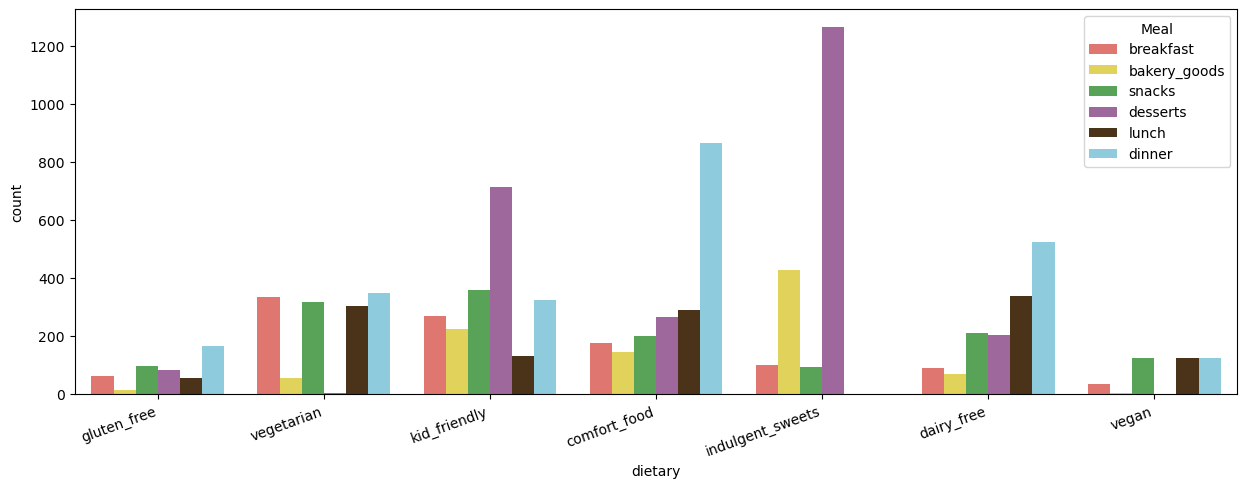

In [35]:
dietry_df_mlt.rename(columns={'variable': 'Meal'}, inplace=True)

fig = plt.subplots(figsize=(15, 5))
sns.countplot(data = dietry_df_mlt, x='dietary',  hue="Meal",
            palette = palette_color)
plt.xticks(rotation = 20, ha='right')
plt.show()

**We can observe that among the recipes categorized as vegetarian, there are hardly any dessert recipes, and in the vegan category, there are none at all.**

**Moreover, in the comfort food category, most recipes are classified as dinner. We anticipated a higher proportion of desserts, pastries, and snacks.**



<div>
<img src="https://github.com/Aviyashap/project-tasty-/blob/main/values-01.jpg?raw=true" width="100%"/>
</div>

**We wanted to check if, when dividing between healthy and unhealthy recipes, we would find anything in the distribution of nutritional values that we would want to focus on.
We conducted the analysis only on the rows that have nutritional values.(nat_val_df)**

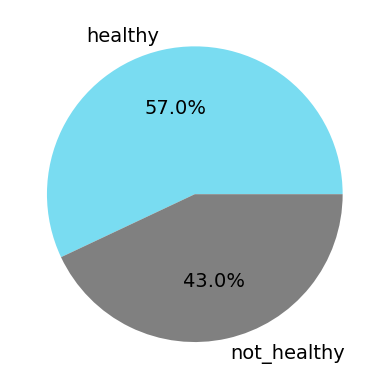

In [36]:
nut_val_df['healthy'].value_counts().plot.pie(autopct='%1.1f%%',colors = ['#79dcf1', 'grey'], textprops={'fontsize': 14})
plt.ylabel("")
plt.show()

Based on the percentage distribution, we can compare between healthy and non-healthy

C:\Users\Aviya Shapira\AppData\Local\Temp\ipykernel_23608\1137546113.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data =nut_val_df, x ="healthy", y ="protein", palette =custom_palette, ax =axes[0, 0])
C:\Users\Aviya Shapira\AppData\Local\Temp\ipykernel_23608\1137546113.py:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data =nut_val_df, x ="healthy", y ="fat", palette =custom_palette, ax =axes[0, 1])
C:\Users\Aviya Shapira\AppData\Local\Temp\ipykernel_23608\1137546113.py:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data =nut_val_df, x ="healthy", y ="calories", palette =custom_palette, ax =axes[0, 2])
C:\Users\Aviya Shapira\AppData\Local\Temp\ipykernel_23608\1137546113.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data =nut_val_df, x ="healthy", y ="sugar", palette =custom_palette, ax =axes[1, 0])
C:\Us

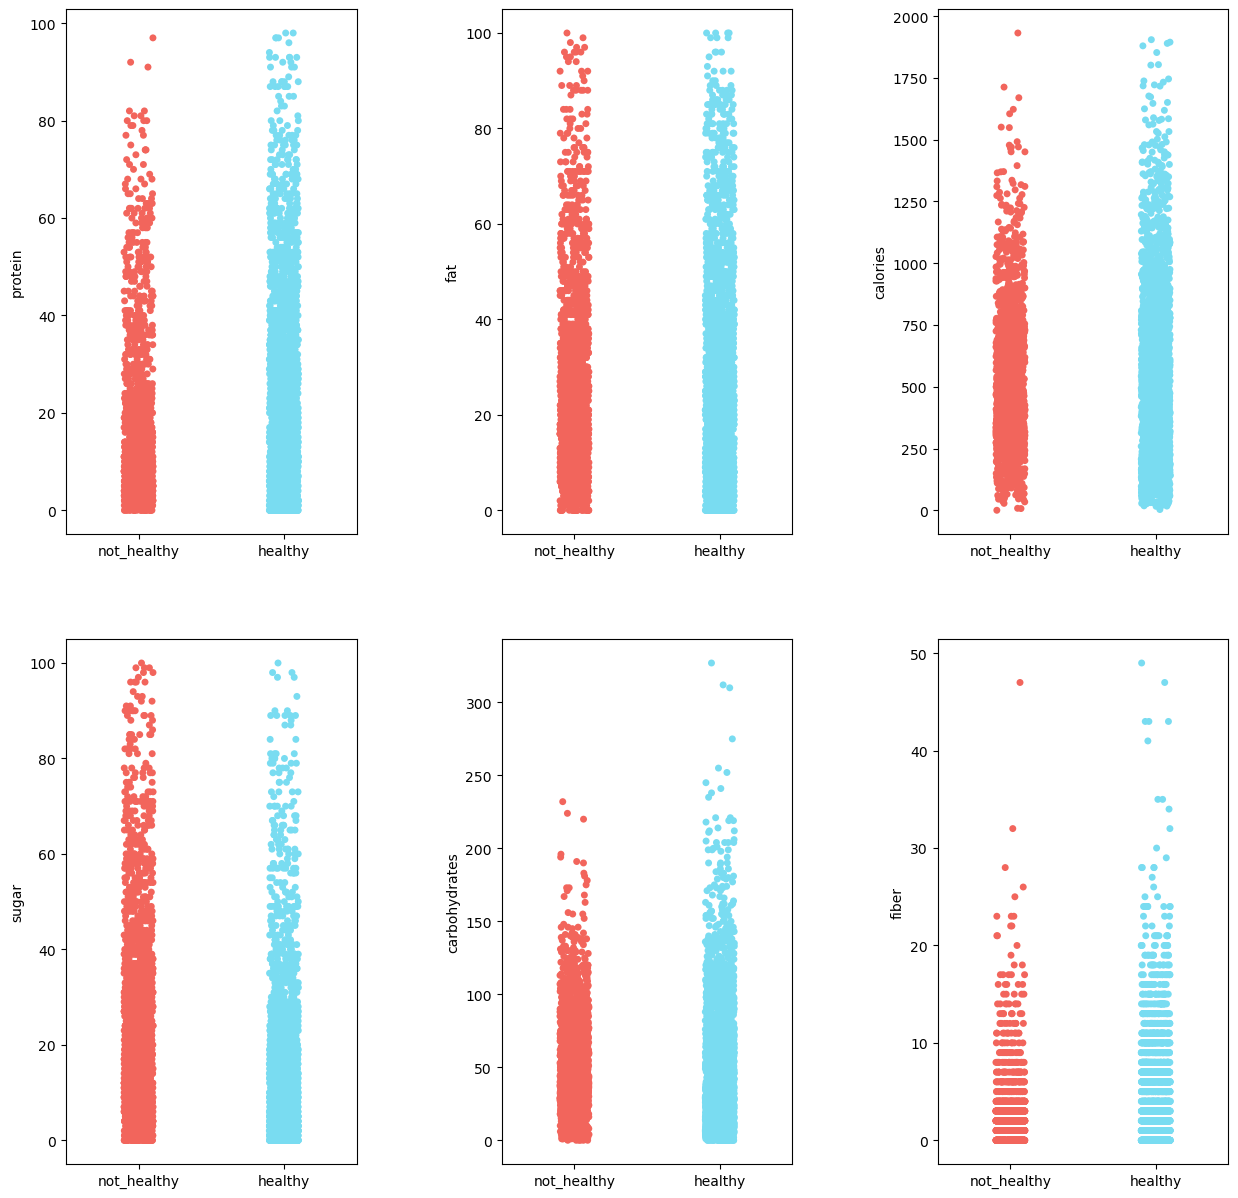

In [37]:
fig, axes = plt.subplots(2,3, figsize=(15,15))
plt.subplots_adjust(wspace = 0.5)
sns.stripplot(data =nut_val_df, x ="healthy", y ="protein", palette =custom_palette, ax =axes[0, 0])
sns.stripplot(data =nut_val_df, x ="healthy", y ="fat", palette =custom_palette, ax =axes[0, 1])
sns.stripplot(data =nut_val_df, x ="healthy", y ="calories", palette =custom_palette, ax =axes[0, 2])
sns.stripplot(data =nut_val_df, x ="healthy", y ="sugar", palette =custom_palette, ax =axes[1, 0])
sns.stripplot(data =nut_val_df, x ="healthy", y ="carbohydrates", palette =custom_palette, ax =axes[1, 1])
sns.stripplot(data =nut_val_df, x ="healthy", y ="fiber", palette =custom_palette, ax =axes[1, 2])
axes[0,0].set_xlabel('')
axes[0,1].set_xlabel('')
axes[0,2].set_xlabel('')
axes[1,0].set_xlabel('')
axes[1,1].set_xlabel('')
axes[1,2].set_xlabel('')
plt.show()

After reviewing the distribution, no notable findings emerged warranting further investigation. Nevertheless, the division aligns with our expectations. For instance, in the calorie distribution, the density of unhealthy recipes initially surpasses that of healthy ones.









<div>
<img src="https://github.com/Aviyashap/project-tasty-/blob/main/values-02.jpg?raw=true" width="100%"/>
</div>

**Is there a common denominator between the recipes that cannot be purchased through the app?**

We will examine the number of recipes that are not purchasable.







In [38]:
tasty_df['is_shoppable'].value_counts()

is_shoppable
True     4714
False     247
Name: count, dtype: int64

Creating new columns with boolean values for each subcategory in the main category "cuisine"







In [39]:
my_dict_cuisine = {key: value for key, value in zip(cuisine["id"].unique(), cuisine["name"].unique())}

def check_and_add_dietary(df, tags_col, mapping_dict):
    for key, name in mapping_dict.items():
        df[name] = df[tags_col].apply(lambda x: True if pd.notnull(x) and str(key) in x.split(',') else False)
    return df

tasty_df = check_and_add_dietary(tasty_df, 'tags', my_dict_cuisine)

In [40]:
my_dict_cuisine.values()

dict_values(['american', 'fusion', 'japanese', 'british', 'french', 'mexican', 'italian', 'german', 'african', 'middle_eastern', 'latin_american', 'dominican', 'seafood', 'chinese', 'greek', 'indian', 'caribbean', 'filipino', 'taiwanese', 'korean', 'jamaican', 'swedish', 'west_african', 'thai', 'vietnamese', 'peruvian', 'brazilian', 'bbq', 'kenyan', 'haitian', 'persian', 'ethiopian', 'cuban', 'puerto_rican', 'soul_food', 'indigenous', 'laotian', 'hawaiian', 'lebanese', 'south_african', 'venezuelan'])

In [41]:
mlt_lst_cuisine = ['american', 'fusion', 'japanese', 'british', 'french', 'mexican', 'italian', 'german', 'african', 'middle_eastern', 'latin_american', 'dominican', 'seafood', 'chinese', 'greek', 'indian', 'caribbean', 'filipino', 'taiwanese', 'korean', 'jamaican', 'swedish', 'west_african', 'thai', 'vietnamese', 'peruvian', 'brazilian', 'bbq', 'kenyan', 'haitian', 'persian', 'ethiopian', 'cuban', 'puerto_rican', 'soul_food', 'indigenous', 'laotian', 'hawaiian', 'lebanese', 'south_african', 'venezuelan']
is_shoppable_df_mlt = pd.melt(tasty_df, id_vars=['is_shoppable','name'], value_vars= mlt_lst_cuisine)
is_shoppable_df_mlt = is_shoppable_df_mlt[is_shoppable_df_mlt['value'] == True]
is_shoppable_df_mlt.rename(columns={'variable': 'cuisine'}, inplace=True)
is_shoppable_df_mlt

,is_shoppable,name,cuisine,value
0,True,Homemade Cinnamon Rolls,american,True
2,True,Fluffy Pancakes,american,True
4,True,Healthy Banana Pancakes,american,True
5,True,How To Make The Fluffiest Pancakes,american,True
7,True,3-Ingredient Banana Oat Smoothie,american,True
...,...,...,...,...
188377,True,Loco Moco Short Rib Tacos,hawaiian,True
188400,True,Hawaii Rice Dish,hawaiian,True
193061,True,Homemade Falafel,lebanese,True
198156,True,South African-Style Grilled Cheese (Braaibrood...,south_african,True


In [42]:
pie_data_shop = is_shoppable_df_mlt[is_shoppable_df_mlt['is_shoppable'] == True]
pie_data_not_shop = is_shoppable_df_mlt[ is_shoppable_df_mlt['is_shoppable'] == False]

all_val = is_shoppable_df_mlt['cuisine'].value_counts()
data_shop = pie_data_shop['cuisine'].value_counts()
data_not_shop = pie_data_not_shop['cuisine'].value_counts()

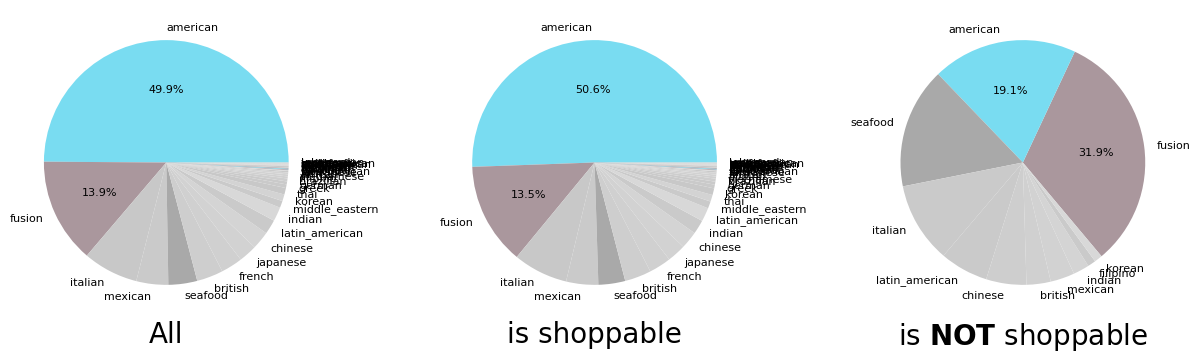

In [43]:
title = 'is ' + r'$\bf{NOT}$' + ' shoppable'

fig, axes = plt.subplots(figsize=(15, 5), ncols=3)
plt.subplots_adjust(wspace = 0.4)

all_val.plot.pie(
    colors = pei_colors, autopct = lambda  pct: ('%1.1f%%' % pct) if pct > 13 else '', 
    textprops={'fontsize': 8}, ax = axes[0])
data_shop.plot.pie(
    colors = pei_colors,autopct = lambda  pct: ('%1.1f%%' % pct) if pct > 13 else '',
    textprops={'fontsize': 8}, ax = axes[1])
data_not_shop.plot.pie(
    colors = pei_colors_1, autopct = lambda  pct: ('%1.1f%%' % pct) if pct > 18 else '',
    startangle=310, textprops={'fontsize': 8}, ax = axes[2])


axes[0].set_xlabel('All', fontsize=20)
axes[1].set_xlabel('is shoppable', fontsize=20)
axes[2].set_xlabel(title, fontsize=20)
axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[2].set_ylabel('')
plt.show()

In [44]:
pie_data_not_shop['cuisine'] = pie_data_not_shop['cuisine'].apply(lambda x: 'american' if x == 'american' else 'not_american')
pie_data_shop['cuisine'] = pie_data_shop['cuisine'].apply(lambda x: 'american' if x == 'american' else 'not_american')

C:\Users\Aviya Shapira\AppData\Local\Temp\ipykernel_23608\1383710688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pie_data_not_shop['cuisine'] = pie_data_not_shop['cuisine'].apply(lambda x: 'american' if x == 'american' else 'not_american')
C:\Users\Aviya Shapira\AppData\Local\Temp\ipykernel_23608\1383710688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pie_data_shop['cuisine'] = pie_data_shop['cuisine'].apply(lambda x: 'american' if x == 'american' else 'not_american')


In [45]:
counts_shop = pie_data_shop['cuisine'].value_counts()
percentages_shop = (counts_shop / counts_shop.sum()) * 100
percentages_shop = percentages_shop.reset_index()
percentages_shop.columns = ['cuisine', 'percentage']


counts_not = pie_data_not_shop['cuisine'].value_counts()
percentages_not = (counts_not / counts_not.sum()) * 100
percentages_not = percentages_not.reset_index()
percentages_not.columns = ['cuisine', 'percentage']

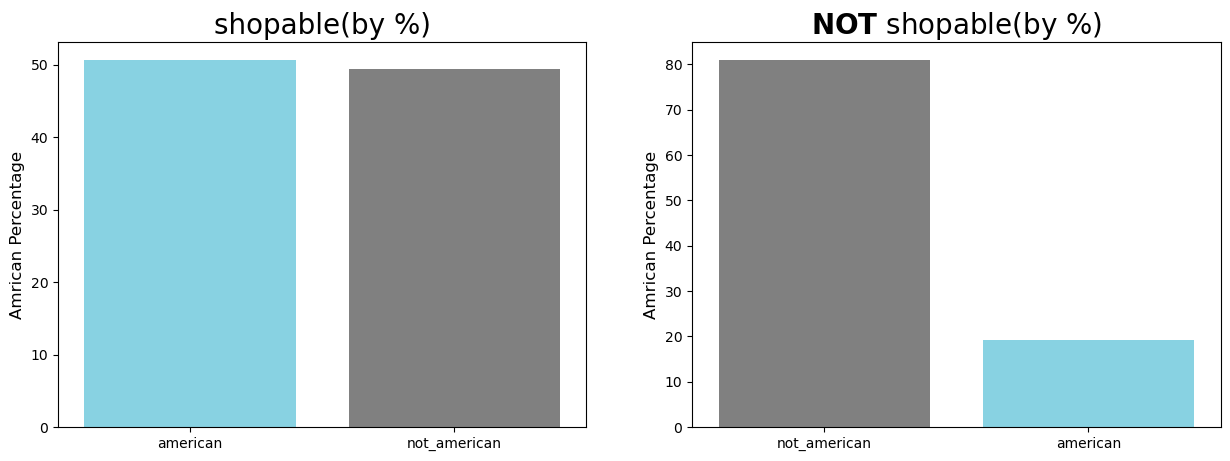

In [46]:
fig, axes = plt.subplots(figsize=(15, 5), ncols=2)
sns.barplot(palette = ['#79dcf1', 'grey'], y='percentage', x='cuisine', data=percentages_shop, ax=axes[0])
sns.barplot(palette = ['grey', '#79dcf1'], y='percentage', x='cuisine', data=percentages_not, ax=axes[1])

title_1 = r'$\bf{NOT}$' + ' shopable(by %)'
axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[0].set_ylabel('Amrican Percentage', fontsize=12)
axes[1].set_ylabel('Amrican Percentage', fontsize=12)
axes[0].set_title('shopable(by %)', fontsize=20)
axes[1].set_title(title_1, fontsize=20)
plt.show()

We tested several connection between the products that cannot be bought and different variables in the data.

**Finally, we found that there is a connection between the kitchen of the recipe and the ability to purchase its products.**

**We can see that about 50% of the recipes on the website are associated with American cuisine, on the other hand, in the recipes where the products cannot be bought, only about 19% are American**

In [47]:
tasty_df_fil = is_shoppable_df_mlt[ is_shoppable_df_mlt['is_shoppable'] == False]
tasty_df_fil.dropna(subset ="cuisine",inplace = True)
order_y = tasty_df_fil['cuisine'].value_counts().sort_values(ascending=False).index 

C:\Users\Aviya Shapira\AppData\Local\Temp\ipykernel_23608\1875210217.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tasty_df_fil.dropna(subset ="cuisine",inplace = True)


After checking, we found that most of the not shoppable recipes are not American. We would like to analysis which cuisines they are associated with.

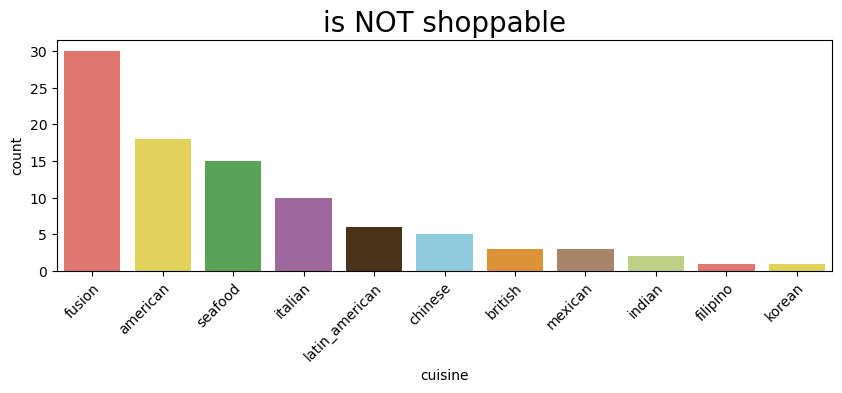

In [48]:
plt.figure(figsize=(10,3))
sns.countplot(x="cuisine",  data=tasty_df_fil, order= order_y, palette = palette_color)
plt.title("is NOT shoppable", fontsize=20)
plt.ylabel("count")
plt.xlabel("cuisine")
plt.xticks(rotation=45, ha='right', rotation_mode='anchor') 
plt.show()

In [49]:
category_counts_3 = tasty_df_fil['cuisine'].value_counts()
category_percentages_3 = (category_counts_3 / category_counts_3.sum()) * 100
category_percentages_3 = category_percentages_3.reset_index()
category_percentages_3.columns = ['cuisine', 'percentage']

category_counts_4 = is_shoppable_df_mlt['cuisine'].value_counts()
category_percentages_4 = (category_counts_4 / category_counts_4.sum()) * 100
category_percentages_4 = category_percentages_4.reset_index()
category_percentages_4.columns = ['cuisine', 'percentage']


In [50]:
category_percentages_4.head(5)

,cuisine,percentage
0,american,49.897424
1,fusion,13.859129
2,italian,7.294279
3,mexican,4.217005
4,seafood,3.806702


In [51]:
category_percentages_3.head(3)

,cuisine,percentage
0,fusion,31.914894
1,american,19.148936
2,seafood,15.957447


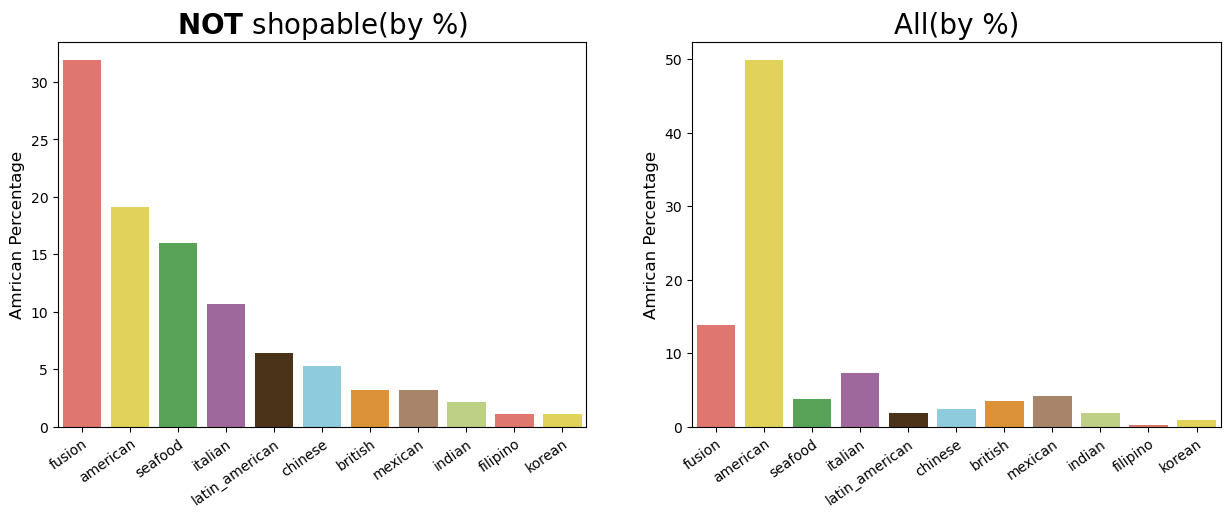

In [52]:
fig, ax = plt.subplots(figsize=(15, 5), ncols=2)
sns.barplot(y ='percentage', x='cuisine', data = category_percentages_3, ax=ax[0], palette = palette_color)
sns.barplot(y ='percentage', x='cuisine', data = category_percentages_4, ax=ax[1], palette = palette_color,order = order_y)


title_1 = r'$\bf{NOT}$' + ' shopable(by %)'
ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[0].set_ylabel('Amrican Percentage', fontsize=12)
ax[1].set_ylabel('Amrican Percentage', fontsize=12)
ax[1].set_title('All(by %)', fontsize=20)
ax[0].set_title(title_1, fontsize=20)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=35, ha='right', rotation_mode='anchor') 
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=35, ha='right', rotation_mode='anchor') 
plt.show()

**It can be seen that the highest value for components that cannot be purchased are those defined as a "fusion" 
And this despite the fact that they make up a total of 13.85% of the total recipes**

**An additional intriguing observation is the representation of "seafood" recipes, which constitute 3.8% of the total recipes. Notably,cannot be purchased recipes within this category comprise 15.9% of the total.**


<div>
<img src="https://github.com/Aviyashap/project-tasty-/blob/main/values_4_4.jpg?raw=true" width="100%"/>
</div>

**In the following analysis, we examined whether there is a conection between the ratio of negatie to positive responses and the Score given to the recipe.**

**Additionally, we analysis if there is any factor that affects the outliers.**

In [53]:
tasty_df['rating_divide'] = tasty_df["ratings_negative"]/tasty_df["ratings_positive"]

In [54]:
tasty_df['rating_divide'].value_counts()

rating_divide
0.000000    243
0.166667     44
0.200000     39
0.500000     38
0.333333     38
           ... 
0.082164      1
0.211694      1
0.052525      1
0.038540      1
0.550000      1
Name: count, Length: 2847, dtype: int64

[0.05263158 0.        ]
[0.16981132 0.34549356]
[0. 0.]
[0.34549356 0.34549356]
[0.0952381 0.0952381]


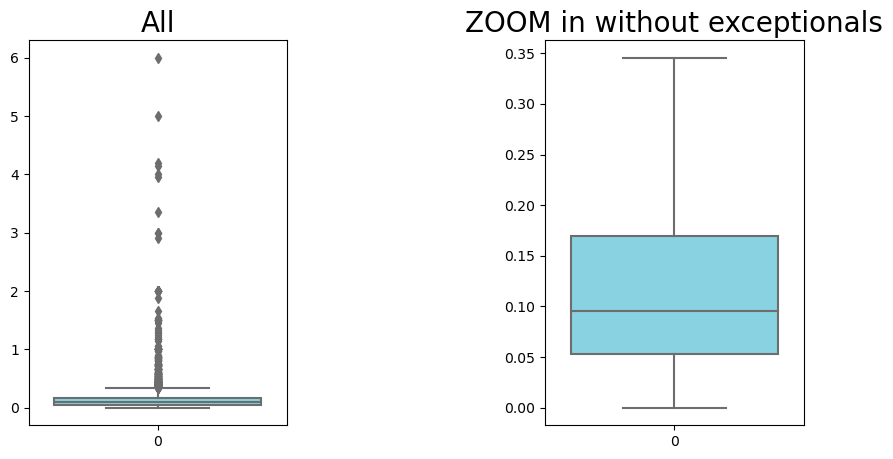

In [55]:
fig, axes = plt.subplots(figsize=(10, 5), ncols=2)
plt.subplots_adjust(wspace = 1)
sns.boxplot(data = tasty_df['rating_divide'], showfliers=True, ax = axes[0], palette=[custom_palette[1]])
a = sns.boxplot(data = tasty_df['rating_divide'], showfliers=False, ax = axes[1], palette=[custom_palette[1]])
axes[0].set_title('All', fontsize=20)
axes[1].set_title('ZOOM in without exceptionals', fontsize=20)
for line in a.lines:
    print(line.get_ydata())

In [56]:
rating_unusual = tasty_df[tasty_df['rating_divide'] > 0.35]
rating_usual = tasty_df[tasty_df['rating_divide'] <= 0.35]

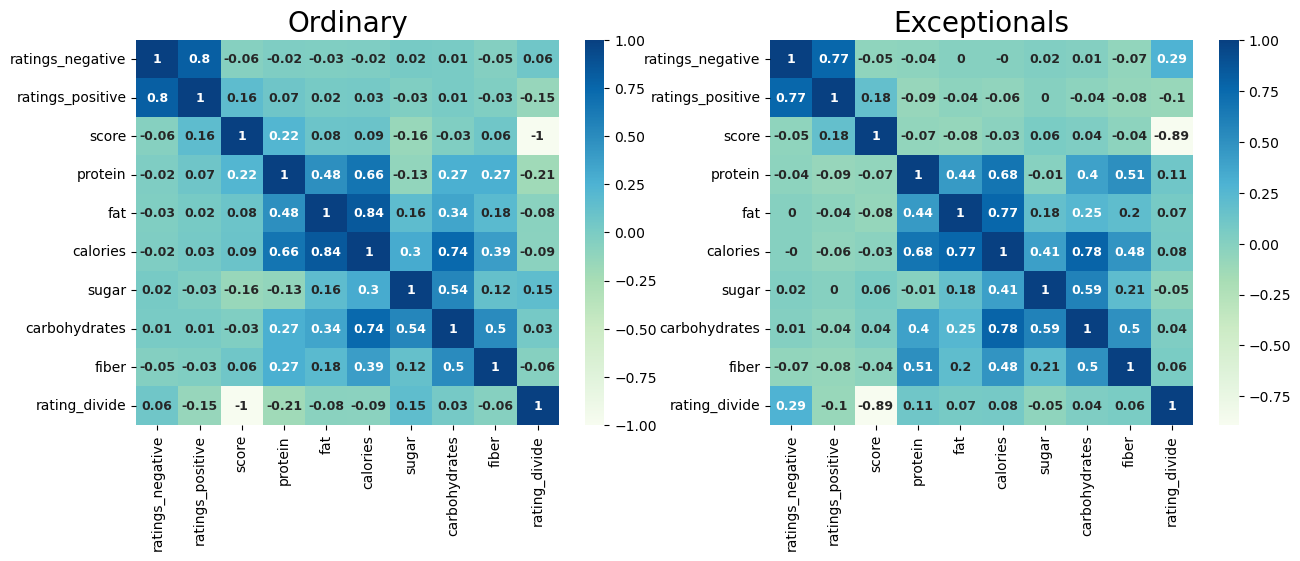

In [57]:
features_1= ['ratings_negative', 'ratings_positive', 'score', 'protein', 'fat', 'calories', 'sugar', 'carbohydrates', 'fiber','rating_divide']
fig, axes = plt.subplots(figsize=(15, 5), ncols=2)
correlations_1= rating_unusual[features_1].corr().round(2)
correlations_2= rating_usual[features_1].corr().round(2)
sns.heatmap(data=correlations_1,cmap= 'GnBu',annot=True, ax=axes[1],
            annot_kws = {'fontsize' : 9, 'fontweight' : 'bold'})
sns.heatmap(data=correlations_2, cmap= 'GnBu',annot=True, ax=axes[0],
            annot_kws = {'fontsize' : 9, 'fontweight' : 'bold'})
axes[1].set_title('Exceptionals', fontsize=20)
axes[0].set_title('Ordinary', fontsize=20)
plt.show()

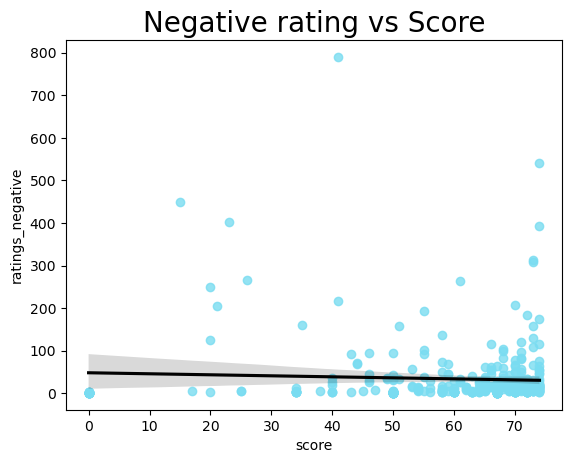

In [58]:
sns.regplot(data=rating_unusual, x='score', y='ratings_negative', scatter_kws={"color": "#79dcf1"}, line_kws={"color": "black"})
plt.title('Negative rating vs Score', fontsize=20)
plt.show()

C:\Users\Aviya Shapira\anaconda3\Lib\site-packages\numpy\core\function_base.py:157: RuntimeWarning: invalid value encountered in multiply
  y *= step
C:\Users\Aviya Shapira\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1577: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


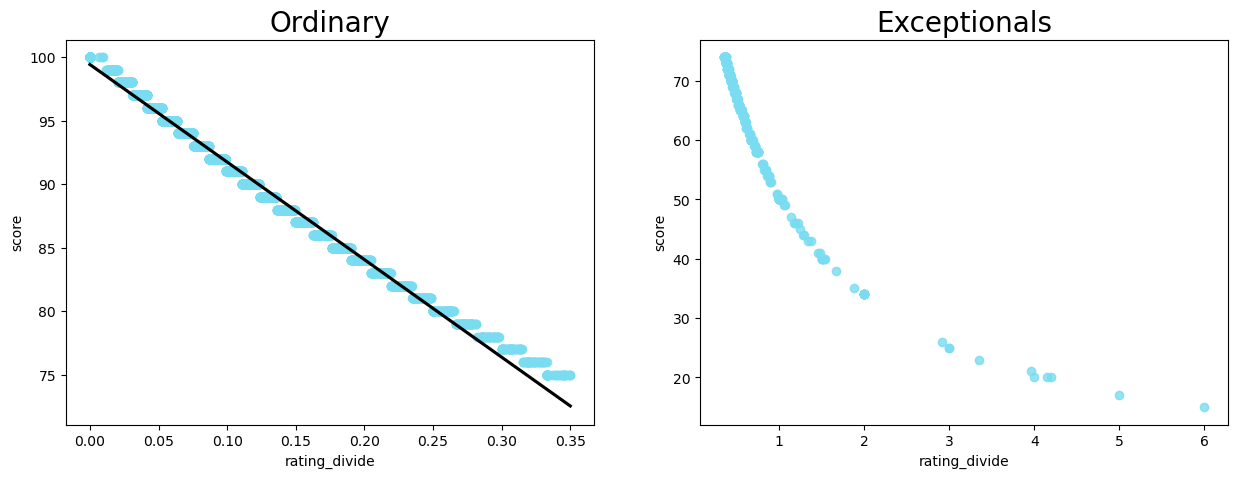

In [59]:
fig, axes = plt.subplots(figsize=(15, 5), ncols=2)
sns.regplot(data = rating_usual, x = 'rating_divide', y = 'score',scatter_kws={"color": "#79dcf1"}, line_kws={"color": "black"}, ax = axes[0])
sns.regplot(data = rating_unusual, x = 'rating_divide', y = 'score',scatter_kws={"color": "#79dcf1"}, line_kws={"color": "black"}, ax = axes[1])
axes[1].set_title('Exceptionals', fontsize=20)
axes[0].set_title('Ordinary', fontsize=20)
plt.show()

 **The ratio of negative to positive responses directly indicates the recipe score. As the percentage of negative responses increases, the score decreases**


**As can be seen in the upper graph, when we only examined the conection between negative responses and the score, we couldn't gain this insight. It was only when we analyzed the negative responses in ratio to the positive ones that we could see this.**


It can be observed that in the majority of recipes, the ratio favors positive responses and falls between 0 and 0.35. We aimed to investigate the factors influencing those categorized as outliers, particularly focusing on those with a ratio exceeding 1, indicating more negative responses than positive ones.






In [60]:
def categorize_rating(value):
    if value <= 0.35:
        return 'usual'
    elif 0.35 < value <= 1:
        return 'unusual'
    else:
        return 'x_unusual'
tasty_df['usual_rating'] = tasty_df['rating_divide'].apply(categorize_rating)
len(tasty_df['usual_rating'])

4961

In [61]:
tasty_df['usual_rating'].value_counts()

usual_rating
usual        4519
unusual       309
x_unusual     133
Name: count, dtype: int64

C:\Users\Aviya Shapira\AppData\Local\Temp\ipykernel_23608\2537940986.py:2: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  sns.scatterplot(data = tasty_df, x = "rating_divide", y = "fiber", palette = palette_color, hue = "usual_rating",  ax = axes[0,0])
C:\Users\Aviya Shapira\AppData\Local\Temp\ipykernel_23608\2537940986.py:3: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  sns.scatterplot(data = tasty_df, x = "rating_divide", y = "fat", palette = palette_color, hue = "usual_rating",  ax = axes[0,1])
C:\Users\Aviya Shapira\AppData\Local\Temp\ipykernel_23608\2537940986.py:4: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  sns.scatterplot(data = tasty_df, x = "rating_divide", y = "protein", palette = palette_color, hue = "usual_rating",  ax = axes[1,0])
C:\Users\Aviya Shapira\AppData\Local\Temp\ipykernel_23608\2537940986.py:5: UserWarning: The pa

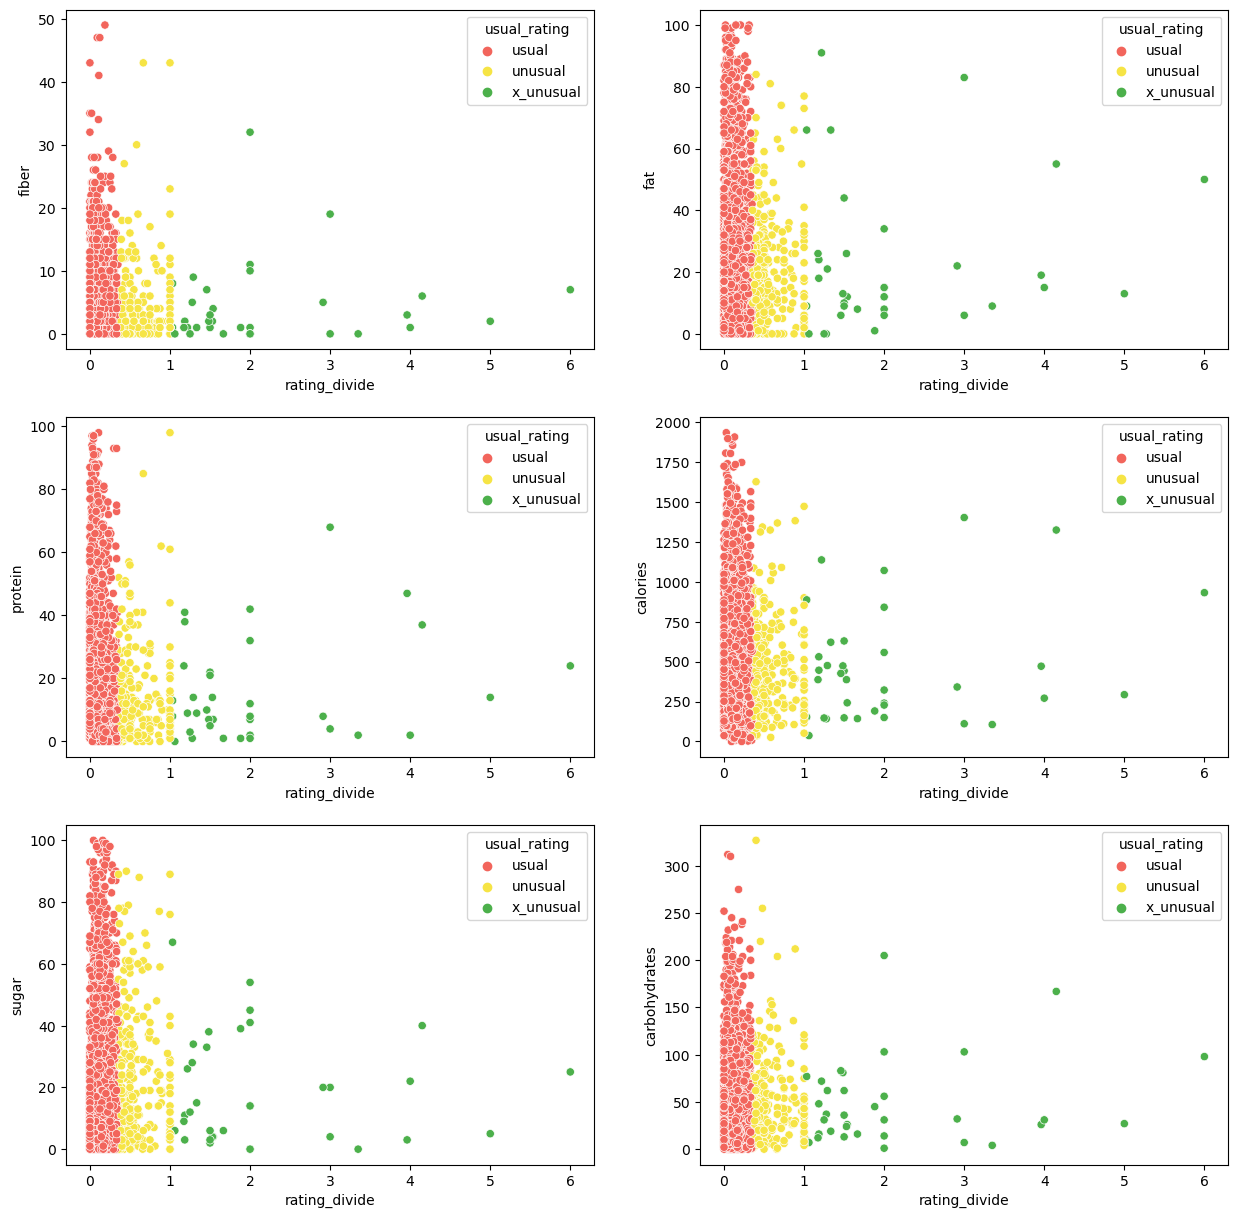

In [62]:
fig, axes = plt.subplots(3,2, figsize=(15, 15))
sns.scatterplot(data = tasty_df, x = "rating_divide", y = "fiber", palette = palette_color, hue = "usual_rating",  ax = axes[0,0])
sns.scatterplot(data = tasty_df, x = "rating_divide", y = "fat", palette = palette_color, hue = "usual_rating",  ax = axes[0,1])
sns.scatterplot(data = tasty_df, x = "rating_divide", y = "protein", palette = palette_color, hue = "usual_rating",  ax = axes[1,0])
sns.scatterplot(data = tasty_df, x = "rating_divide", y = "calories", palette = palette_color, hue = "usual_rating",  ax = axes[1,1])
sns.scatterplot(data = tasty_df, x = "rating_divide", y = "sugar", palette = palette_color, hue = "usual_rating",  ax = axes[2,0])
sns.scatterplot(data = tasty_df, x = "rating_divide", y = "carbohydrates", palette = palette_color, hue = "usual_rating",  ax = axes[2,1])
plt.show()

We examined the distribution of nutritional values across three categories: "usual," "unusual," and "especially unusual" However, we did not identify any nutritional parameters that could be singled out as a contributing factor to anomaly.







In [63]:
tasty_df['usual_rating'].unique()

array(['usual', 'unusual', 'x_unusual'], dtype=object)

In [64]:
tasty_df.columns

Index(['country', 'description', 'id_', 'keywords', 'is_shoppable', 'language',
       'name', 'slug', 'video_url', 'is_licensed_video', 'is_community',
       'inspired_by', 'linked_recipes', 'tags', 'cook_time', 'prep_time',
       'total_time', 'ratings_negative', 'ratings_positive', 'score',
       'protein', 'fat', 'calories', 'sugar', 'carbohydrates', 'fiber',
       'healthy', 'holiday', 'gluten_free', 'vegetarian', 'kid_friendly',
       'comfort_food', 'indulgent_sweets', 'dairy_free', 'keto', 'vegan',
       'pescatarian', 'contains_alcohol', 'breakfast', 'bakery_goods',
       'drinks', 'snacks', 'desserts', 'lunch', 'dinner', 'appetizers',
       'sides', 'brunch', 'american', 'fusion', 'japanese', 'british',
       'french', 'mexican', 'italian', 'german', 'african', 'middle_eastern',
       'latin_american', 'dominican', 'seafood', 'chinese', 'greek', 'indian',
       'caribbean', 'filipino', 'taiwanese', 'korean', 'jamaican', 'swedish',
       'west_african', 'thai', 'vi

In [65]:
usual = tasty_df[tasty_df['usual_rating'] == "usual"]
unusual = tasty_df[tasty_df['usual_rating'] == "unusual"]
x_unusual = tasty_df[tasty_df['usual_rating']== "x_unusual"]

In [66]:
mlt_list = ['gluten_free', 'vegetarian', 'kid_friendly',
       'comfort_food', 'indulgent_sweets', 'dairy_free', 'keto', 'vegan',
       'pescatarian', 'contains_alcohol']

# המסת ה-DataFrame של usual
usual_df_mlt_1 = pd.melt(usual, id_vars=['usual_rating'], value_vars=mlt_list)
usual_df_mlt_1 = usual_df_mlt_1[usual_df_mlt_1['value'] == True]

# המסת ה-DataFrame של unusual
unusual_df_mlt_1 = pd.melt(unusual, id_vars=['usual_rating'], value_vars=mlt_list)
unusual_df_mlt_1 = unusual_df_mlt_1[unusual_df_mlt_1['value'] == True]

# המסת ה-DataFrame של x_unusual
x_unusual_df_mlt_1 = pd.melt(x_unusual, id_vars=['usual_rating'], value_vars=mlt_list)
x_unusual_df_mlt_1 = x_unusual_df_mlt_1[x_unusual_df_mlt_1['value'] == True]

usual_df_mlt_1

,usual_rating,variable,value
1,usual,gluten_free,True
12,usual,gluten_free,True
28,usual,gluten_free,True
32,usual,gluten_free,True
34,usual,gluten_free,True
...,...,...,...
44842,usual,contains_alcohol,True
44919,usual,contains_alcohol,True
45060,usual,contains_alcohol,True
45064,usual,contains_alcohol,True


In [67]:
order_y_1 = usual_df_mlt_1['variable'].value_counts().sort_values(ascending=False).index 

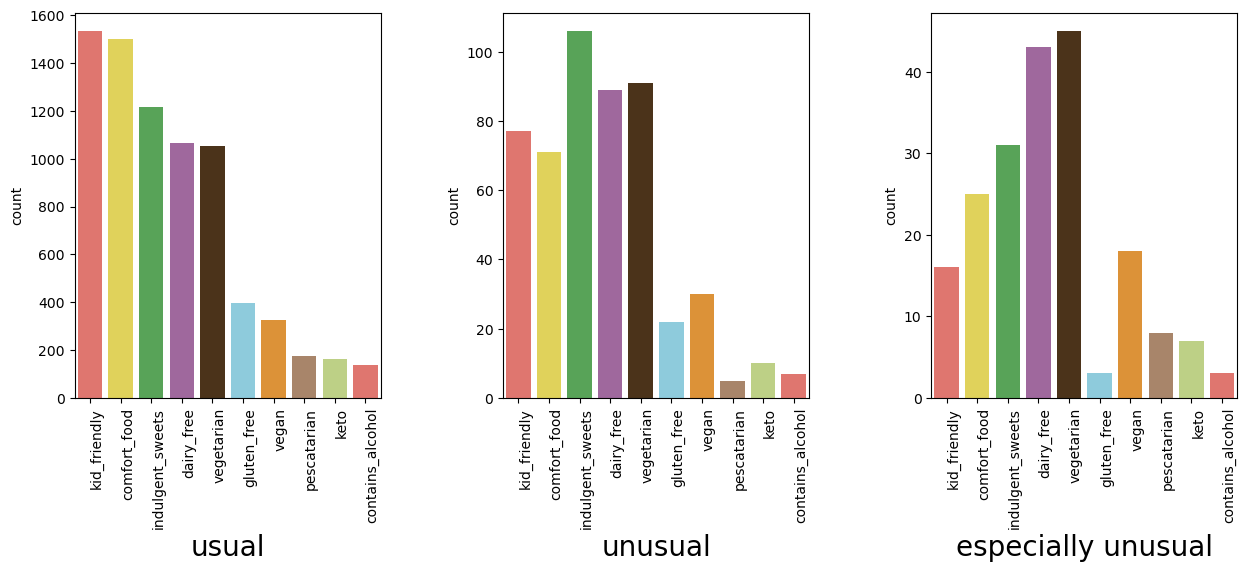

In [68]:
fig, axes = plt.subplots(ncols = 3, figsize=(15, 5))
plt.subplots_adjust(wspace = 0.4)

sns.countplot(x='variable', data = usual_df_mlt_1, palette=palette_color,order=order_y_1, ax = axes[0])
sns.countplot(x='variable', data = unusual_df_mlt_1, palette=palette_color,order=order_y_1, ax = axes[1])
sns.countplot(x='variable', data = x_unusual_df_mlt_1, palette=palette_color,order=order_y_1, ax = axes[2])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='right', rotation_mode='anchor') 
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90, ha='right', rotation_mode='anchor') 
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90, ha='right', rotation_mode='anchor') 
axes[0].set_xlabel('usual', fontsize=20)
axes[1].set_xlabel('unusual', fontsize=20)
axes[2].set_xlabel('especially unusual', fontsize=20)
plt.show()

**It can be observed that after categorizing by "dietary" types, there is an increase in the percentage of the following menus: "Vegetarian," "Dairy-Free" and "Vegan" as the ratio of negative responses to positive ones rises.**

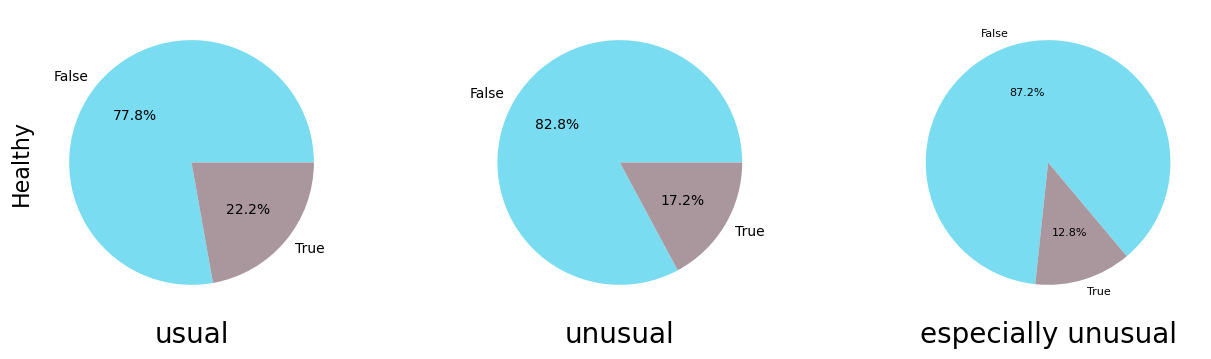

In [70]:

fig, axes = plt.subplots(figsize=(15, 5), ncols=3)
plt.subplots_adjust(wspace = 0.4)
usual['healthy'].value_counts().plot.pie(
    colors = pei_colors, autopct='%1.1f%%',
    textprops={'fontsize': 10}, ax = axes[0])
unusual['healthy'].value_counts().plot.pie(
    colors = pei_colors, autopct='%1.1f%%',
    textprops={'fontsize': 10}, ax = axes[1])
x_unusual['healthy'].value_counts().plot.pie(
    colors = pei_colors, autopct='%1.1f%%',
    startangle=310, textprops={'fontsize': 8}, ax = axes[2])


axes[0].set_xlabel('usual', fontsize=20)
axes[1].set_xlabel('unusual', fontsize=20)
axes[2].set_xlabel('especially unusual', fontsize=20)
axes[0].set_ylabel('Healthy', fontsize=16)
axes[1].set_ylabel('')
axes[2].set_ylabel('')
plt.show()

We tried to check if the percentage of healthy recipes changes when looking at the outlier recipes. We can see that there is a decrease in the percentage of healthy recipes, but it is minimals.

**Understanding that our goal is for the ratio to favor positive responses, we wanted to check if there is a stronger variable in recipes where negative responses have a weight greater than 0.35. This was done to identify it as a negative influencer in the recipe.**

**We examined several variables from the given data. We chose to display only a few of them to demonstrate the process. We searched for any variable that could directly influence the ratio. As can be seen, we did not find any significant insight. Therefore, we can assume that there are several underlying factors that may influence the ratio, which are not necessarily represented in this dataset.**